### 1. 데이터 불러오기 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
df = pd.read_csv('/home/piai/PABA_27/BigData/01 실습파일/1 Big Data 분석 기초/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2. 데이터 구조 및 기본 정보 확인 
- PassangerID
- Survived: 생존여부
    - 0(=사망), 1(=생존)
- PClass: 승객 등급 
    - 1,2,3등급 
- Name: 승객의 이름
- Sex: 승객의 성별
- Age: 승객의 나이 
- SibSp: 함께 탑승한 형제, 배우자의 수 
- Parch: 함께 탑승한 자녀, 부모의 수 
- Ticket: 티켓 아이디 
- Fare: 티켓 요금 (파운드)
- Cabin: 객실 번호 
- Embarked: 승객이 탑승한 곳 
    - C(Cherbourg), Q(Queenstown), S(Southampton)   

In [3]:
# 상위 5개 행
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 데이터 속성 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 데이터의 행과 열 형태 
df.shape

(891, 12)

In [6]:
# 결측치 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

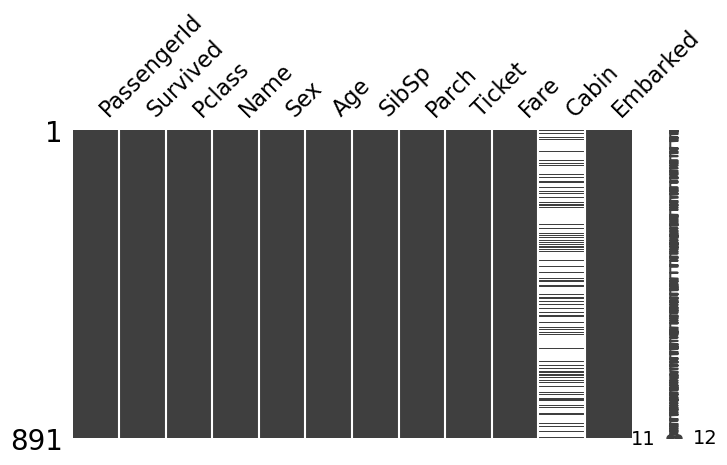

In [14]:
# 결측치 시각화
import missingno as msno 
msno.matrix(df, figsize=(8, 4))

- Cabin과 Embarked에 결측치가 존재한다.
- 특히, Cabin의 결측치가 상당히 많이 존재하여 Feature로 사용하기에 어려워 보인다.

<Axes: >

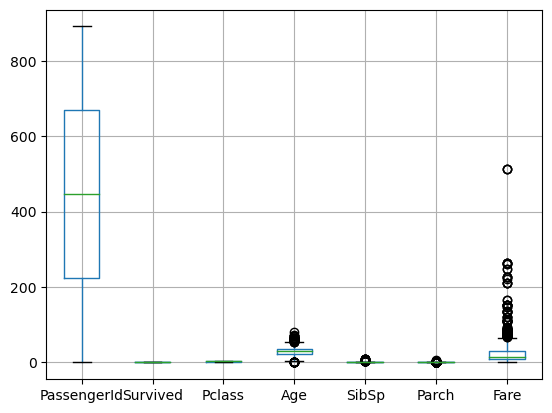

In [9]:
# 이상치 
df.boxplot()

In [10]:
# 기술통계량 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. 데이터 전처리 

In [77]:
# 결측치는 평균값으로 대체 
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('N', inplace=True)

In [78]:
# 객실번호는 첫자리만 별도의 변수로 생성 
df['Cabin'] = df['Cabin'].str.get(i=0)

In [79]:
# 나이에 대한 파생변수 생성 
# 14세 이하: Child, 28세 이하: Young, 45세 이하: Middle, 56세 이하: Prime, 나머지: Old
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 14, 28, 45, 56, 100], labels=['Child', 'Young', 'Middle', 'Prime', 'Old'])
df['AgeGroup'].value_counts()

Middle    426
Young     285
Child      77
Prime      68
Old        35
Name: AgeGroup, dtype: int64

In [80]:
# 가족수 계산
df['Family'] = df['Parch'] + df['SibSp']

In [81]:
# 요금 구간화
# 50 이하 0, 100 이하 1, 200 이하 2, 300 이하 3, 나머지 4
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 50, 100, 200, 300, 1000], labels=[0, 1, 2, 3, 4])
df['FareGroup'].value_counts()

0    716
1    107
2     33
3     17
4      3
Name: FareGroup, dtype: int64

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,AgeGroup,Family,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Young,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Middle,Middle,0,0


### 4. 변수 분포 확인 및 관계 확인

#### 4.1. 목표변수 (생존여부) 분포 확인 

In [11]:
# 목표 변수(생존 비율) 분포 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

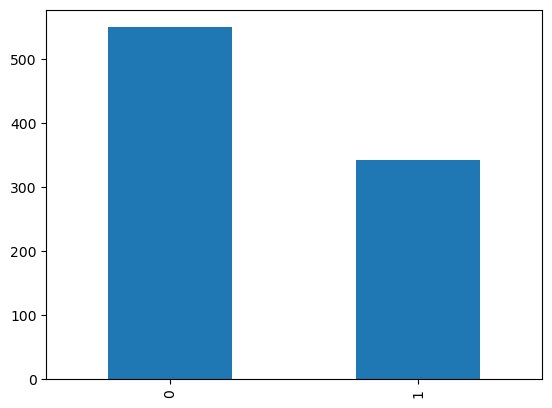

In [60]:
# 생존 비율의 빈도수 현황
df['Survived'].value_counts().plot(kind='bar')

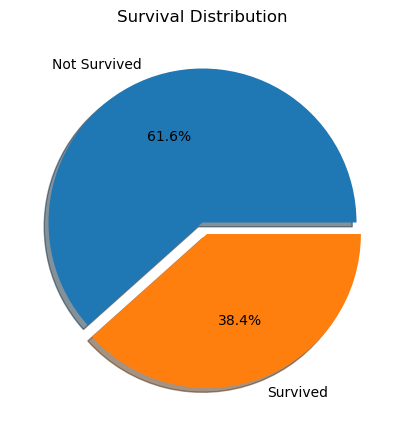

In [23]:
# 생존비율 
plt.figure(figsize=(8,5))
labels= ['Not Survived', 'Survived']
df['Survived'].value_counts().plot.pie(explode=[0, 0.08], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()

- 사망 비율은 61.6%, 생존 비율은 38.4%로 사망한 탑승객의 수가 더 많은 것으로 확인된다.

#### 4.2. 범주형 변수 분포 확인 

##### 4.2.1. 성별 분포 

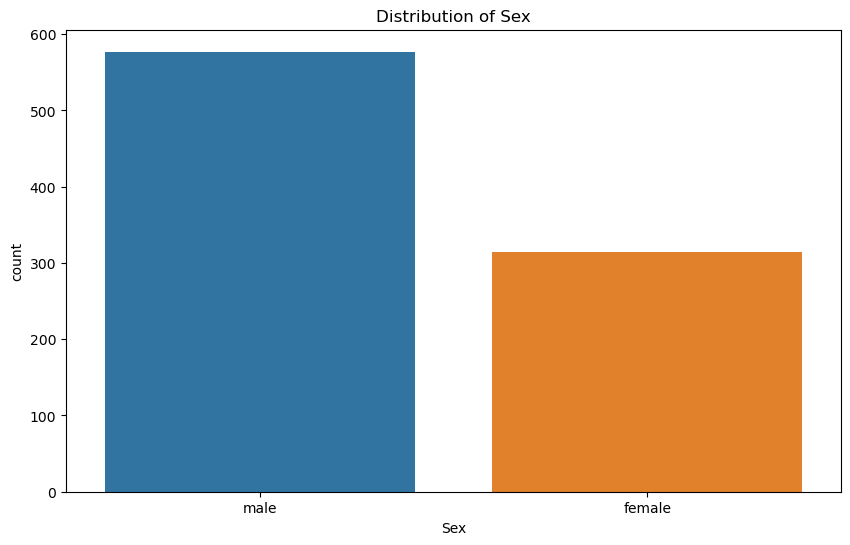

In [83]:
# 성별 분포 
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.show()

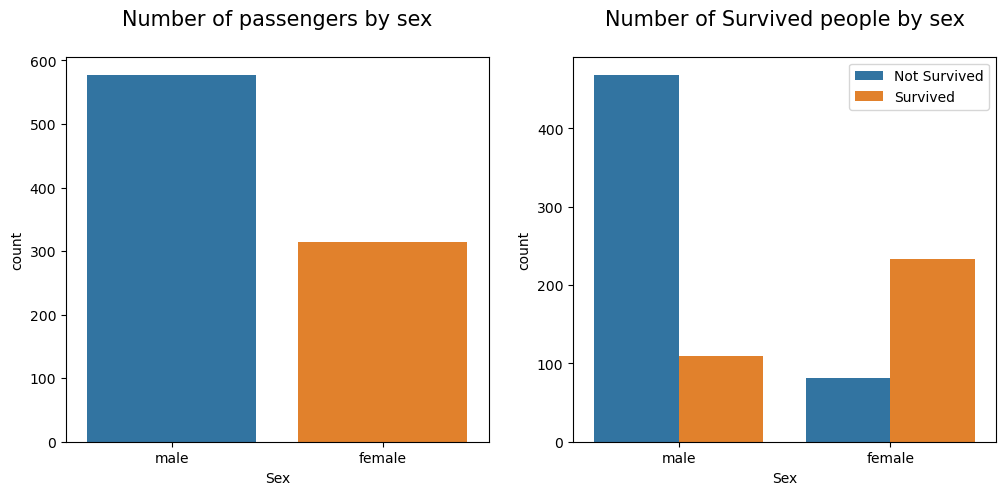

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 성별 탑승자 수 
axes[0].set_title("Number of passengers by sex\n", size=15)
sns.countplot(x="Sex", data=df, ax=axes[0])

# 성별 생존자 수 
axes[1].set_title("Number of Survived people by sex\n", size=15)
sns.countplot(x="Sex", hue="Survived", data=df, ax=axes[1])
axes[1].legend(labels=['Not Survived', 'Survived'])

- 남성의 탑승자 수가 더 많지만 여성의 생존자 수가 더 많다. 

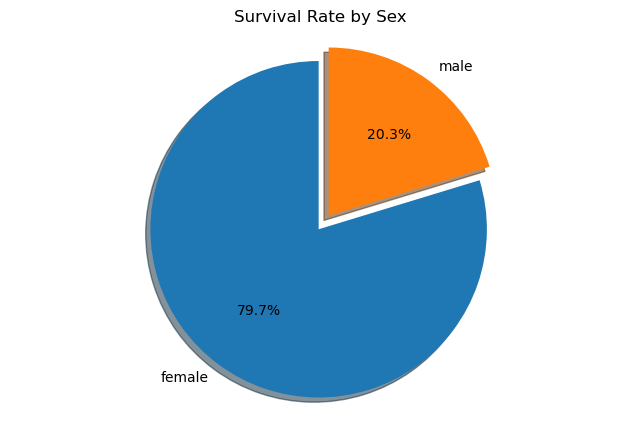

In [64]:
# 성별 생존률
sex_survival_rate = df[['Sex', 'Survived']].groupby('Sex').mean()

plt.figure(figsize=(8,5))
plt.pie(sex_survival_rate['Survived'], labels=sex_survival_rate.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], shadow=True)
plt.title('Survival Rate by Sex')
plt.axis('equal')  
plt.show()

- 여성의 생존률은 약 74.2%, 남성의 생존률은 약 18.9%로 여성의 생존률이 압도적으로 높은 것이 확인된다. 
    - 남성보다 여성을 먼저 구조한것으로 보인다.

##### 4.2.2. 객실 등급 분포 

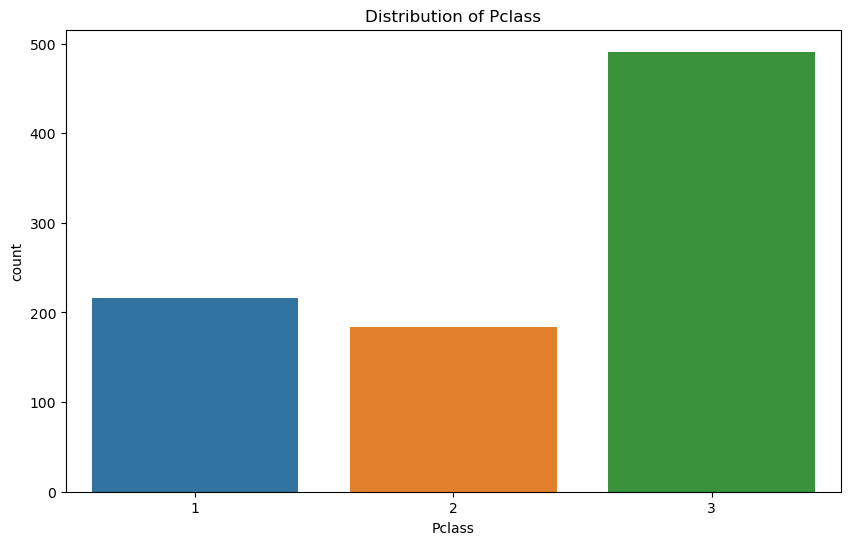

In [84]:
# 객실 등급 분포 
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.show()

In [29]:
# 선실 등급별 탑승자 수
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- 1등석의 생존률은 약 63%, 2등석의 생존률은 약 47.3%, 3등석의 생존률은 약 24.2%이다.
- 3등석 탑승객들이 1,2등석의 탑승객들에 비해 많이 사망한 것으로 보인다.

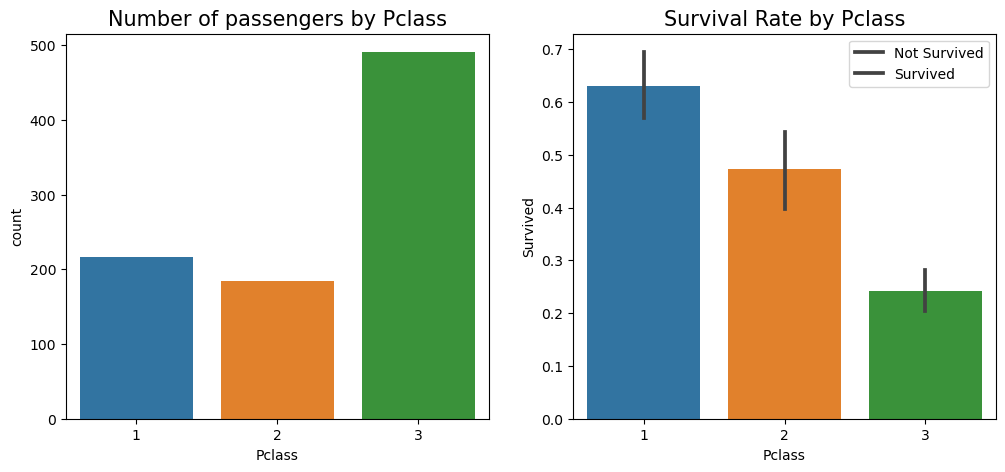

In [32]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

# 객실 등급별 탑승자 수
axes[0].set_title('Number of passengers by Pclass', size=15)
sns.countplot(x='Pclass', data=df, ax=axes[0])

# 객실 등급별 생존자 수
axes[1].set_title('Survival Rate by Pclass', size=15)
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
axes[1].legend(labels=['Not Survived', 'Survived'])

- 3등석 탑승객이 가장 많고, 3등석 탑승객의 사망 인원수 또한 가장 많다. 
- 상대적으로 1등석 탑승객들은 인원수 대비 많이 살아남은 것으로 보인다.

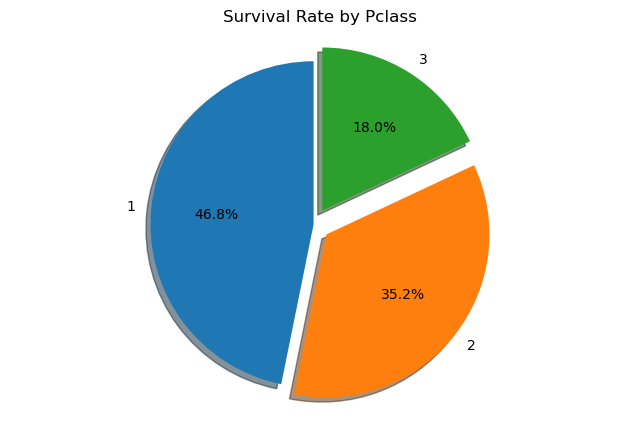

In [66]:
# 객실 등급별 생존율 계산 
pclass_survival_rate = df[['Pclass', 'Survived']].groupby('Pclass').mean()

plt.figure(figsize=(8,5))
plt.pie(pclass_survival_rate['Survived'], labels=pclass_survival_rate.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0.1], shadow=True)
plt.title('Survival Rate by Pclass')
plt.axis('equal')  # 파이 차트를 원형으로 유지
plt.show()

- 1등석이 가장 높은 생존률을 보이고 3등석이 가장 낮은 생존률을 보인다.
- 객실 등급은 생존 여부에 영향을 미치는 것으로 보인다.

##### 4.2.3. 승선 항구 분포 

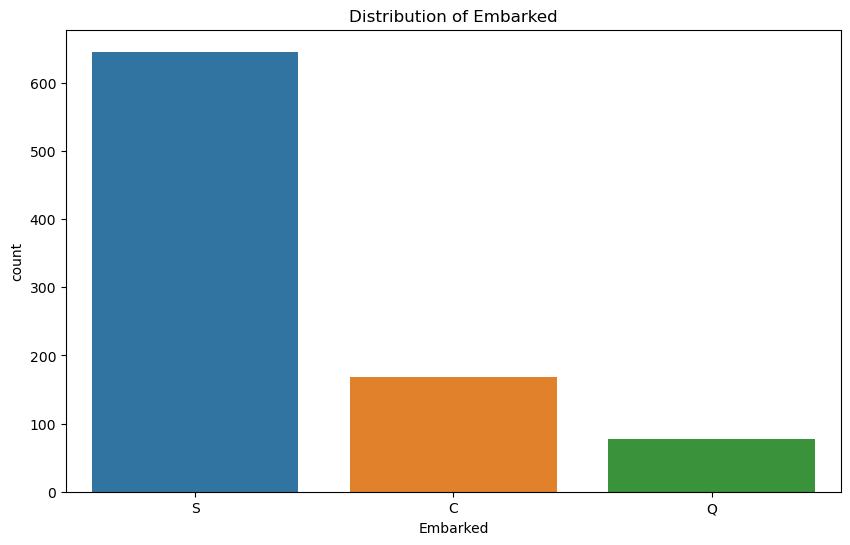

In [85]:
# 승선 항구 분포
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked')
plt.show()

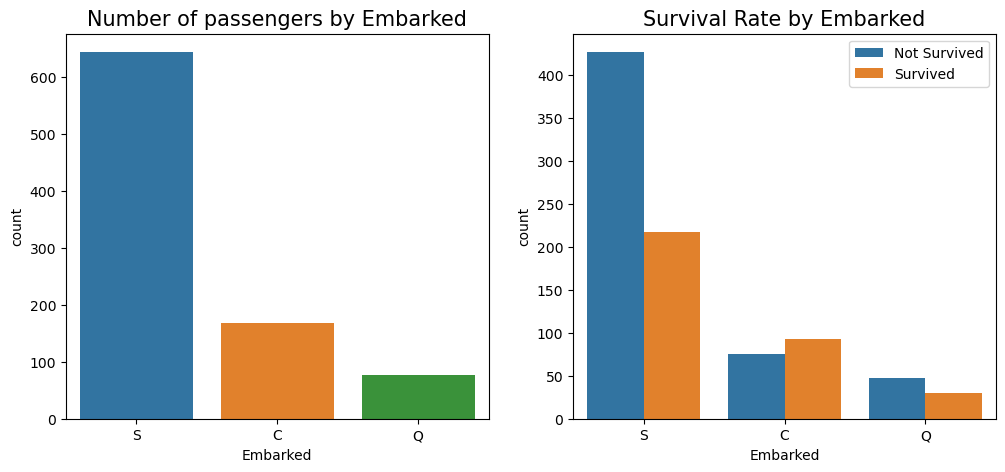

In [37]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

# 승선 항구별 탑승자 수
axes[0].set_title('Number of passengers by Embarked', size=15)
sns.countplot(x='Embarked', data=df, ax=axes[0])

# 승선 항구별 생존자 수
axes[1].set_title('Survival Rate by Embarked', size=15)
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[1])
axes[1].legend(labels=['Not Survived', 'Survived'])

- Southampton에서 탑승한 승객이 가장 많고, Queenstown에서 탑승한 승객이 제일 적다. 
- Southampton에서 사망한 인원이 가장 많다.

In [38]:
# 승선 항구별 생존률
df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


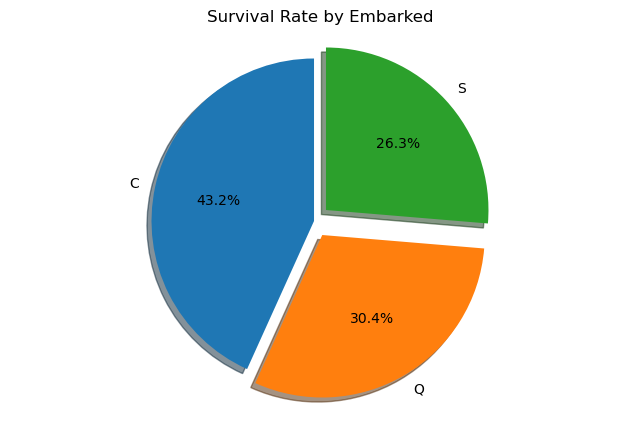

In [67]:
# 승선 항구별 생존률
embarked_survival_rate = df[['Embarked', 'Survived']].groupby('Embarked').mean()

plt.figure(figsize=(8,5))
plt.pie(embarked_survival_rate['Survived'], labels=embarked_survival_rate.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0.1], shadow=True)
plt.title('Survival Rate by Embarked')
plt.axis('equal')  
plt.show()

<Axes: >

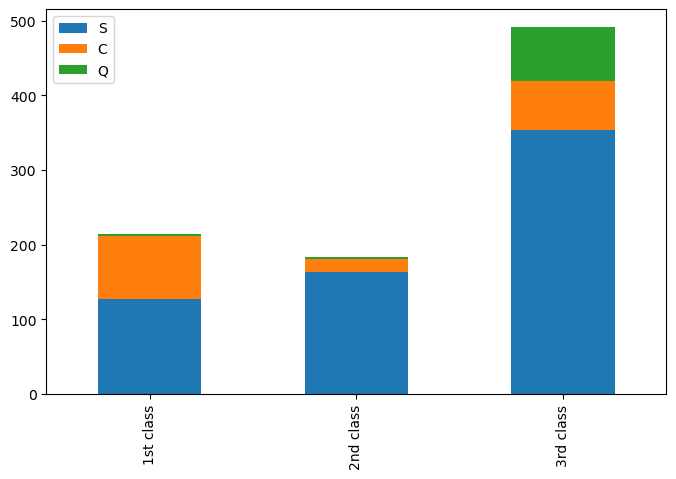

In [39]:
# 항구별 탑승객들의 객실 등급별 분포 
pc1 = df[df['Pclass']==1]['Embarked'].value_counts()
pc2 = df[df['Pclass']==2]['Embarked'].value_counts()
pc3 = df[df['Pclass']==3]['Embarked'].value_counts()
df_pc = pd.DataFrame([pc1, pc2, pc3])
df_pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8,5))
df_pc.plot(kind='bar', stacked=True, ax=ax)

- 3등석에 Southampton 탑승객들이 많은 것을 확인할 수 있다. 
- 3등석의 사망률이 가장 높았기 때문에 Southampton 탑승객들의 사망률이 높은 것으로 볼 수 있다. 

#### 4.3. 연속형 변수 분포 확인

##### 4.3.1. 나이 분포 

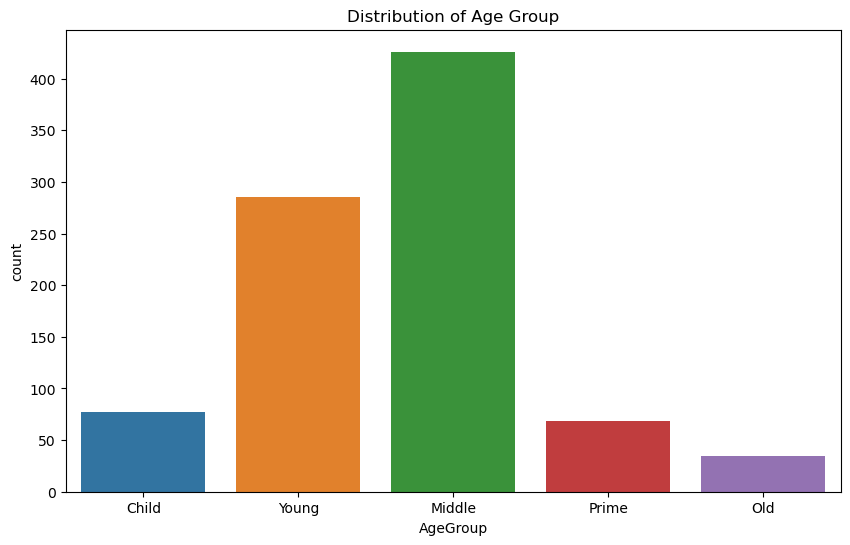

In [86]:
# 나이 그룹 분포 
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=df)
plt.title('Distribution of Age Group')
plt.show()

In [88]:
# 나이 통계량 
df['Age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

- 탑승객들의 평균 나이는 30세이다. 

<Axes: xlabel='Age', ylabel='Count'>

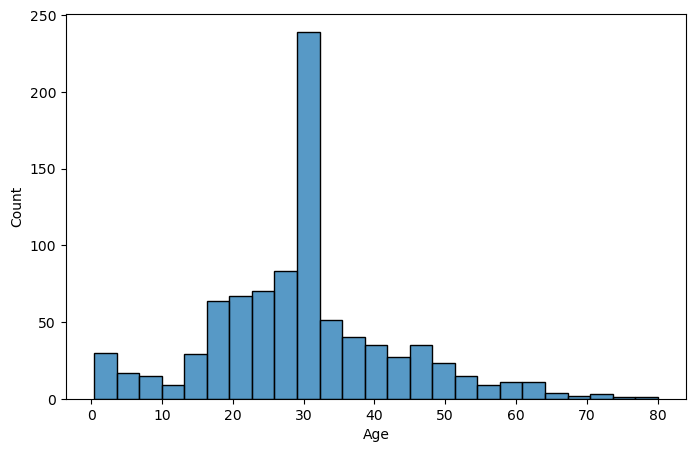

In [89]:
# 나이 분포 
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=25)

- 탑승객들의 나이는 주로 20~40세에 분포하고 있다. 

<Axes: xlabel='Age', ylabel='Count'>

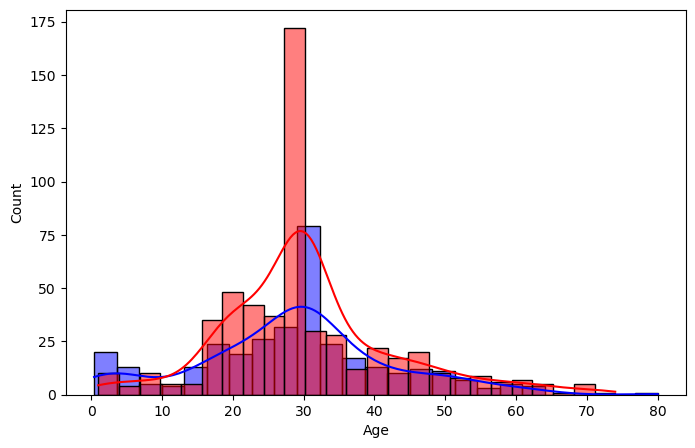

In [43]:
# 나이별 생존자 수
sur = df[df['Survived']==1]
died = df[df['Survived']==0]

plt.figure(figsize=(8,5))
sns.histplot(sur['Age'], bins=25, color='blue', kde=True, label='Survived') 
sns.histplot(died['Age'], bins=25, color='red', kde=True, label='Not Survived')

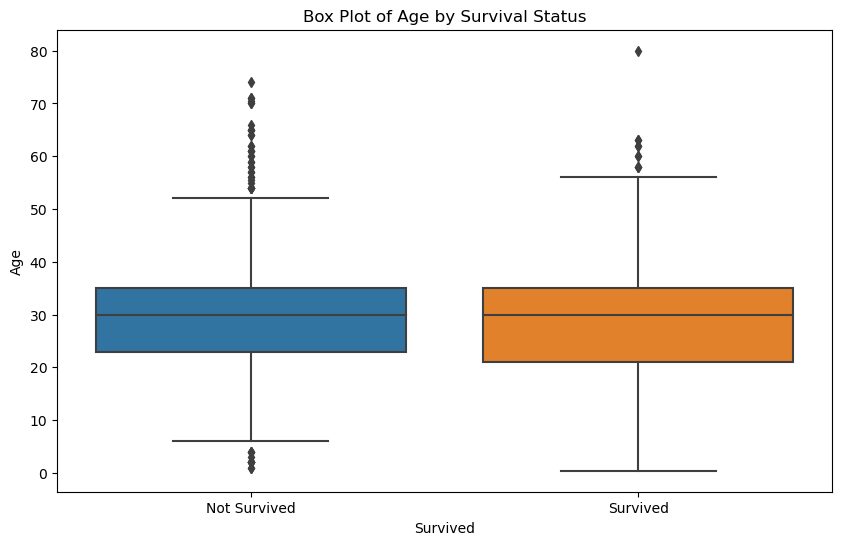

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot of Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

- 어린 나이의 탑승객들의 생존률이 비교적 높고 20-30세의 생존률은 비교적 낮은 것으로 보인다.

##### 4.3.2. 요금 분포 

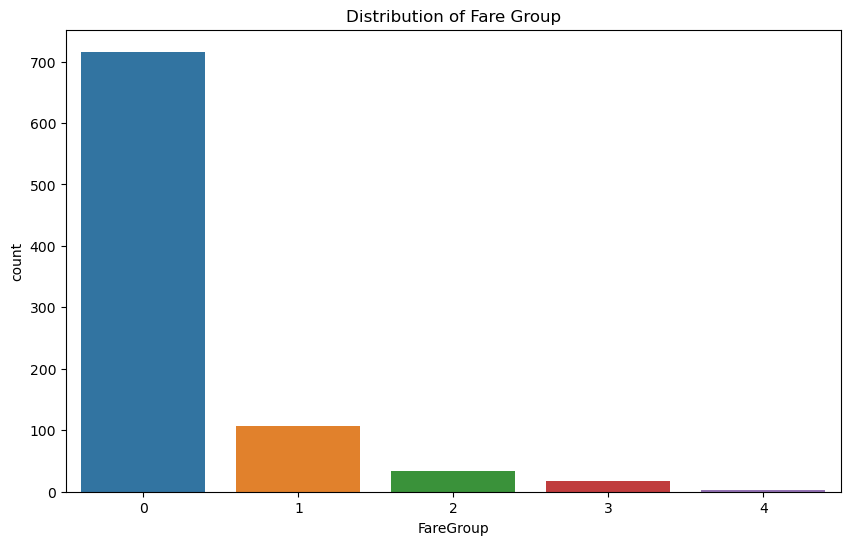

In [90]:
# 요금 그룹 분포 
plt.figure(figsize=(10, 6))
sns.countplot(x='FareGroup', data=df)
plt.title('Distribution of Fare Group')
plt.show()

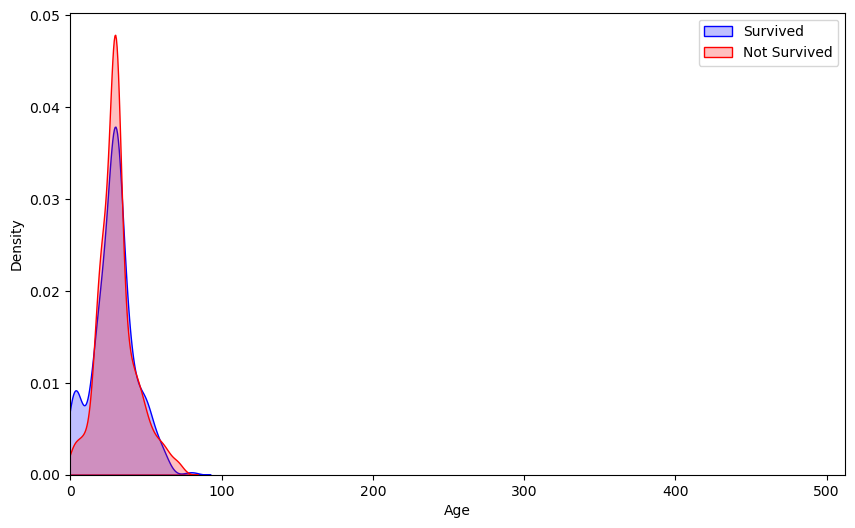

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

# 나이별 생존률
sns.kdeplot(df['Age'][df['Survived']==1], color='blue', fill=True, label='Survived', ax=ax)
sns.kdeplot(df['Age'][df['Survived']==0], color='red', fill=True, label='Not Survived', ax=ax)

# 축 범위 
ax.set(xlim=(0, df['Fare'].max()))
ax.legend(labels=['Survived', 'Not Survived'])

plt.show()

- 탑승 금액이 적은 쪽은 사망률이 높은 것이 확인된다. 
- 객실 등급, 탑승 금액이 생존 여부에 영향을 미치는 것으로 생각할 수 있다.

##### 4.3.3. 동승자 분포 

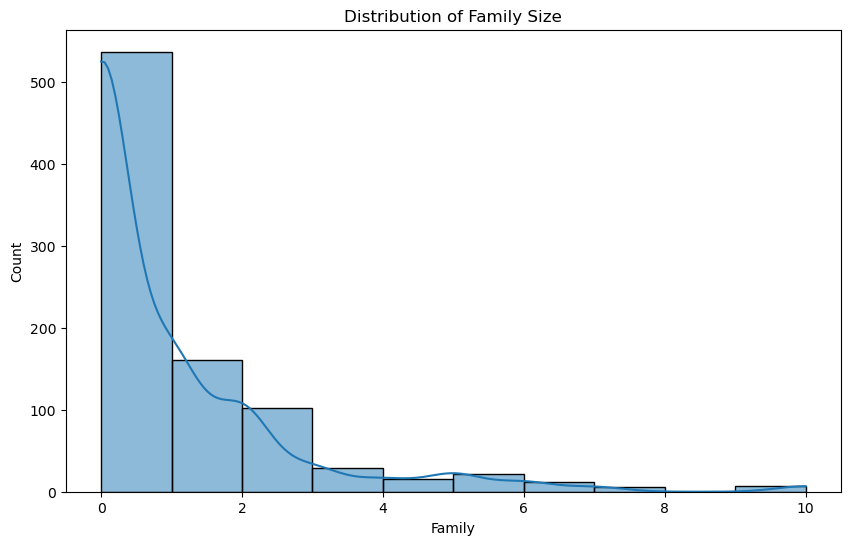

In [91]:
# 가족 수 분포 
plt.figure(figsize=(10, 6))
sns.histplot(df['Family'], bins=10, kde=True)
plt.title('Distribution of Family Size')
plt.show()

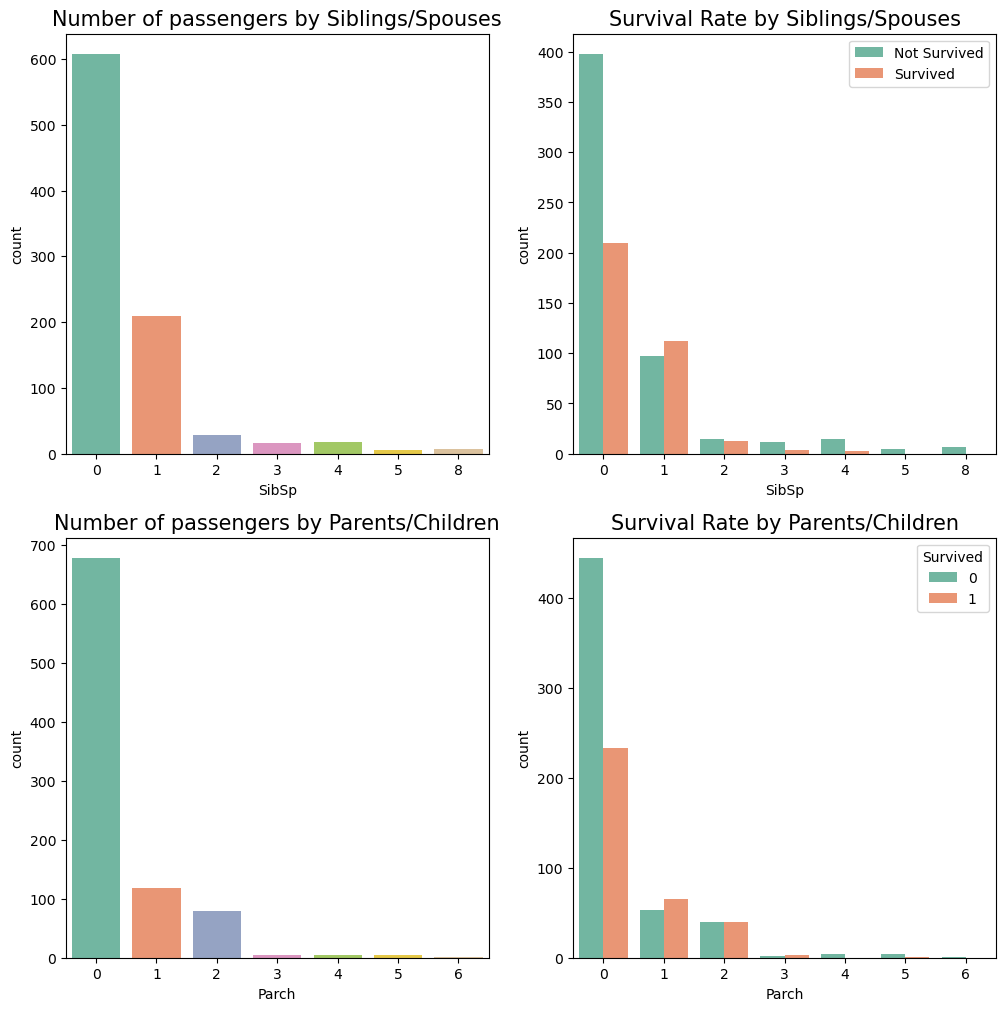

In [49]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

# 부모/자녀 수별 탑승자 수
axes[0][0].set_title('Number of passengers by Siblings/Spouses', size=15)
sns.countplot(x='SibSp', data=df, ax=axes[0][0], palette="Set2")

# 부모/자녀 수별 생존자 수
axes[0][1].set_title('Survival Rate by Siblings/Spouses', size=15)
sns.countplot(x='SibSp', hue='Survived', data=df, ax=axes[0][1], palette="Set2")
axes[0][1].legend(labels=['Not Survived', 'Survived'])

# 형제자매/배우자 수별 탑승자 수
axes[1][0].set_title('Number of passengers by Parents/Children', size=15)
sns.countplot(x='Parch', data=df, ax=axes[1][0], palette="Set2")

# 형제자매/배우자 수별 생존자 수 
axes[1][1].set_title('Survival Rate by Parents/Children', size=15)
sns.countplot(x='Parch', hue='Survived', data=df, ax=axes[1][1], palette="Set2")
axes[0][1].legend(labels=['Not Survived', 'Survived'])

- 혼자 탑승한 탑승객이 가장 많다. 
- 생존 여부를 확인해보았을 때, 혼자 탑승한 사람들이 가장 많이 사망하였다는 것을 확인할 수 있다. 

In [51]:
# 부모/자녀 수별 생존률
df[['SibSp', 'Survived']].groupby('SibSp').mean()  

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [52]:
# 형제자매/배우자 수별 생존률
df[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


- 혼자 탑승한 사람보다 동승자가 있는 탑승객들의 생존률이 더 높다.
- 동승자 없이 혼자 탑승한 사람의 사망률이 가장 높다 

### 5. 생존에 영향을 미치는 잠재 인자 도출

생존률에 영향을 미치는 요인을 확인하기 위해 몇 가지 가설을 세우고, 데이터를 분석한 결과를 정리하였다. 

- 성별은 생존에 중요한 영향을 미친다.

    데이터에서 여성이 남성보다 생존률이 높게 나타났다. 이는 성별이 생존에 큰 영향을 미쳤다는 것을 보여준다.
- 객실 등급은 생존에 중요한 영향을 미친다.

    객실 등급이 높은 승객의 생존률이 더 높았다. 이는 고급 선실의 위치가 구조에 유리했음을 의미할 수 있다. 1등급 승객의 생존율이 특히 높았던 것을 보면, 이들이 더 빠르게 구조될 수 있는 위치에 있었을 가능성이 크다.
- 승선 장소는 생존에 중요한 영향을 미친다.

    승선 항구에 따라 생존률에 차이가 있었다. 특히, Cherbourg에서 탑승한 승객의 생존률이 높았습니다. 이는 Cherbourg에서 탑승한 승객들이 높은 등급의 객실을 더 많이 이용했기 때문일 수 있다. 그러나, 승선 장소만으로 생존률 차이를 완전히 설명하기에는 한계가 있다.
- 나이는 생존에 중요한 영향을 미친다.

    어린아이의 생존률이 특히 높았다. 특히, 생존률이 낮은 2등급과 3등급에서도 어린아이의 생존률이 상대적으로 높았다다. 이는 구조 과정에서 여성과 어린이가 우선적으로 구출되었다고 볼 수 있다.
- 티켓 가격은 생존에 중요한 영향을 미친다.

    티켓 가격은 객실 등급과 밀접한 관계가 있다. 고가의 티켓을 구매한 승객들이 더 높은 등급의 객실을 이용했을 가능성이 높고, 이는 생존률에도 영향을 미쳤을 것이다.
- 동반 탑승 인원 수는 생존에 중요한 영향을 미친다.

    동반 탑승 인원이 많을수록 생존률이 낮아지는 경향이 있다. 그러나, 동반 탑승 인원이 1명 또는 2명일 경우 생존률이 높았다. 이는 가족 단위로 탑승한 승객들이 구조될 가능성이 높았음을 의미한다. 단일 변수로 생존률을 예측하기보다는 여러 변수를 종합적으로 고려하는 것이 필요하다.

[종합 분석 결과]

생존에 영향을 미치는 주요 요인은 다음과 같다:

    Pclass (객실 등급)
    Sex (성별)
    Age (나이)
    Embarked (탑승 항구)